In [21]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Чтение данных
Читаем данные, удаляем ненужные колонки

In [22]:
data = pd.read_csv('./data-001.csv',
                   parse_dates=['date_time'])
data = data.drop(
    columns=['oaid_hash', 'banner_id0', 'banner_id1', 'rate0', 'rate1', 'g0', 'g1', 'coeff_sum0', 'coeff_sum1'])
data = data.sort_values(by='date_time')
data.head()

date_time  zone_id  banner_id  campaign_clicks  os_id  \
1390198  2021-09-01 00:02:49       30        596                0      0   
5041415  2021-09-26 00:00:00       41         29                1      3   
1442602  2021-09-26 00:00:00        1        188                2      2   
7232498  2021-09-26 00:00:00       17         52                2      2   
14938691 2021-09-26 00:00:00       47         73                1      4   

          country_id  impressions  clicks  
1390198            7            1       0  
5041415            0            1       0  
1442602           15            1       0  
7232498            5            1       0  
14938691          13            1       0

### 2. Анализ данных
Проанализируем данные: статистики по каждой фиче, количество уникальных значений, отсутствующих значений, гистограммы распределений значений каждой из фич.

In [23]:
import numpy as np

In [24]:
def analysis(data: pd.DataFrame):
    # множество статистических значений для датасета
    display(data.describe())

    # количество уникальных значений для каждой фичи
    print('Unique values count for each feature:')
    print(data.nunique(axis=0, dropna=True))
    print('-' * 60)

    # распределение значений каждой из фич
    for col in data.drop(columns=['date_time']).columns:
        data.hist(col, figsize=(15, 5), color='green')
        plt.show()

    # количество NaN значений в каждом столбце
    print('NaN values count for each feature:')
    print(data.isna().sum())
    print('-' * 60)

    # распределение количества сэмплов по дате и времени -- позволит увидеть, за какие моменты у нас в принципе есть данные, и в каком объеме
    print(f"Start day: {data['date_time'].min()}")
    print(f"End day: {data['date_time'].max()}")
    print("Date time samples count:")
    display(data.groupby('date_time').size())
    

date_time       zone_id     banner_id  \
count                       15821472  1.582147e+07  1.582147e+07   
mean   2021-09-29 06:17:04.484696576  8.152679e+01  3.816483e+02   
min              2021-09-01 00:02:49  0.000000e+00  0.000000e+00   
25%              2021-09-27 10:24:02  1.400000e+01  5.200000e+01   
50%              2021-09-29 02:22:11  1.900000e+01  2.170000e+02   
75%              2021-09-30 21:36:15  6.000000e+01  6.110000e+02   
max              2021-10-02 23:59:59  3.443000e+03  1.632000e+03   
std                              NaN  1.632448e+02  3.959386e+02   

       campaign_clicks         os_id    country_id  impressions        clicks  
count     1.582147e+07  1.582147e+07  1.582147e+07   15821472.0  1.582147e+07  
mean      6.238540e-01  1.840605e+00  4.346986e+00          1.0  2.668835e-02  
min       0.000000e+00  0.000000e+00  0.000000e+00          1.0  0.000000e+00  
25%       0.000000e+00  1.000000e+00  0.000000e+00          1.0  0.000000e+00  
50%       0.000000e+00  2.000000e+00  4.000000e+00          1.0  0.000000e+00  
75%       0.000000e+00  3.000000e+00  7.000000e+00          1.0  0.000000e+00  
max       8.290000e+02  1.000000e+01  1.600000e+01          1.0  1.000000e+00  
std       9.249152e+00  1.530005e+00  4.317701e+00          0.0  1.611710e-01

Unique values count for each feature:
date_time          604712
zone_id              3444
banner_id            1633
campaign_clicks       822
os_id                  11
country_id             17
impressions             1
clicks                  2
dtype: int64
------------------------------------------------------------


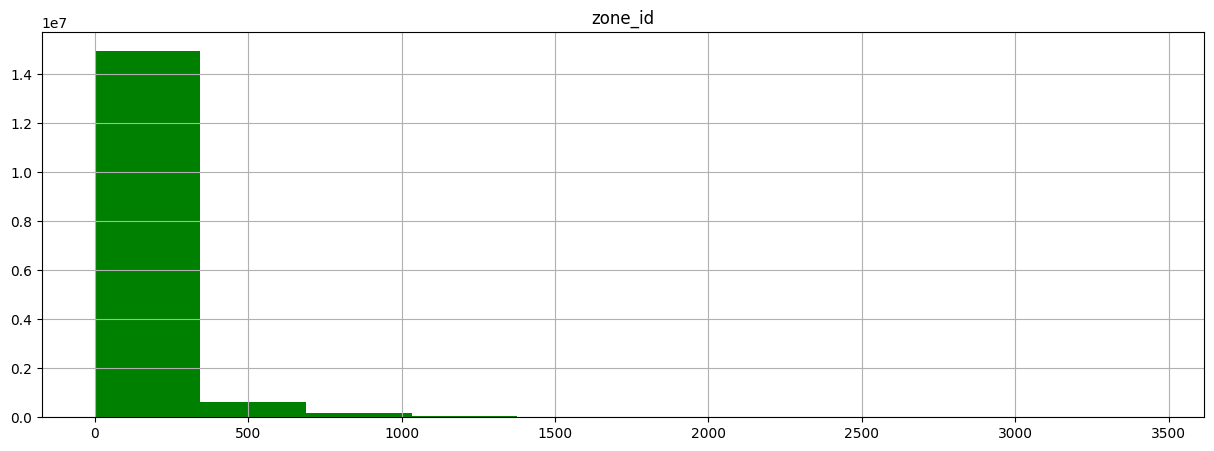

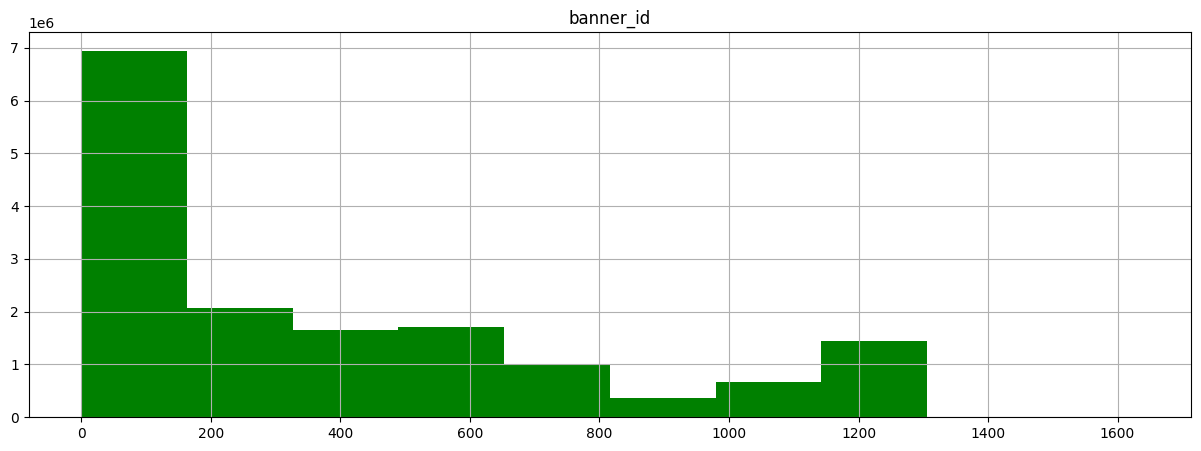

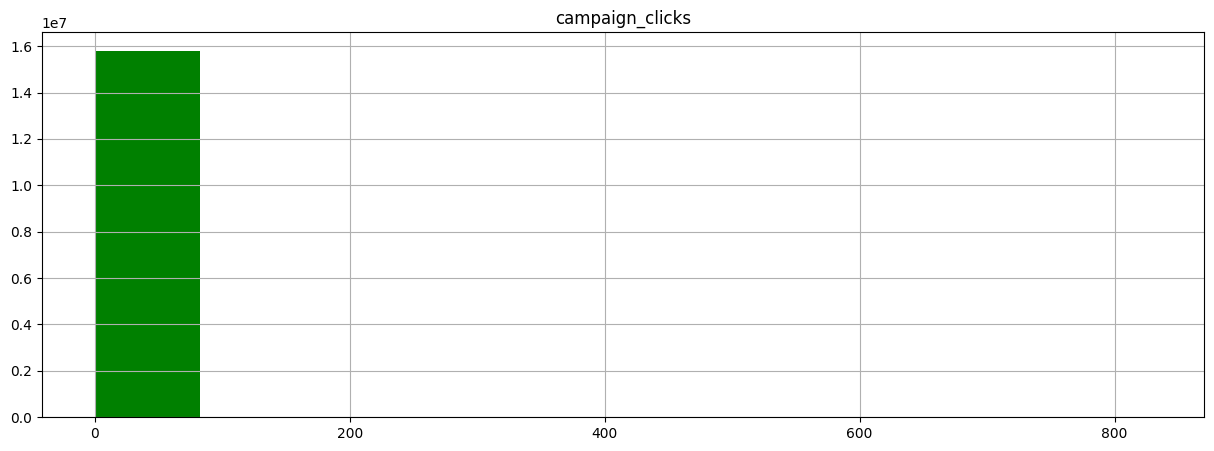

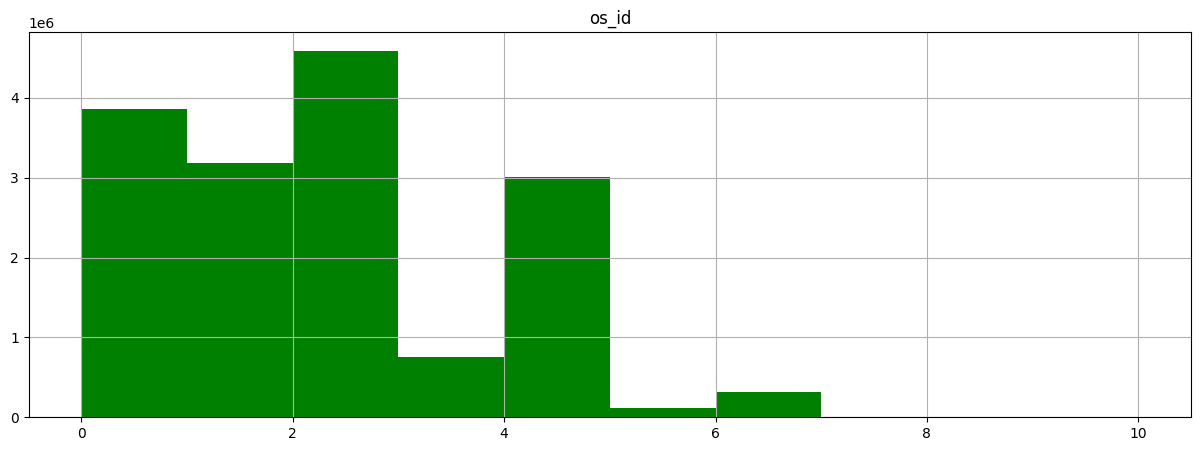

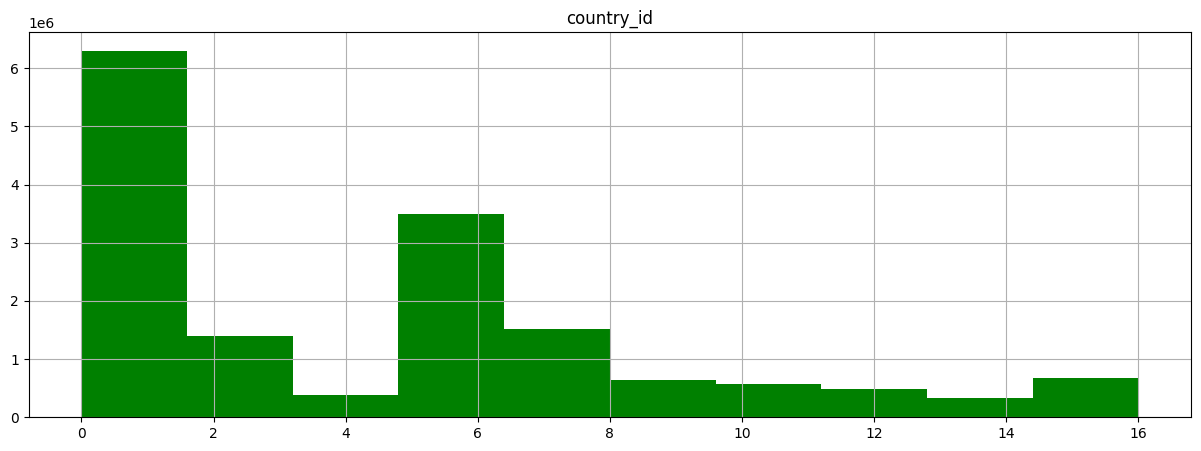

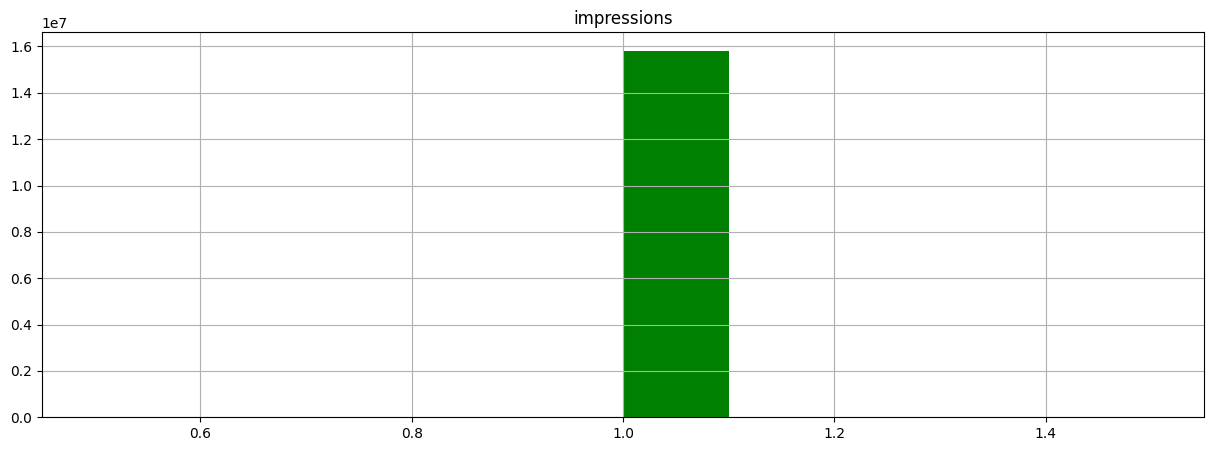

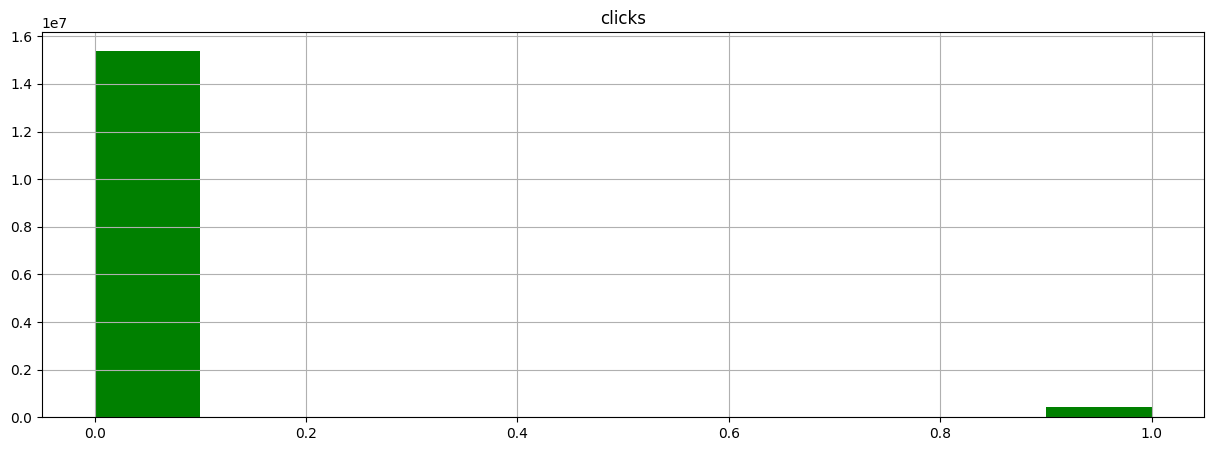

NaN values count for each feature:
date_time          0
zone_id            0
banner_id          0
campaign_clicks    0
os_id              0
country_id         0
impressions        0
clicks             0
dtype: int64
------------------------------------------------------------
Start day: 2021-09-01 00:02:49
End day: 2021-10-02 23:59:59
Date time samples count:


date_time
2021-09-01 00:02:49     1
2021-09-26 00:00:00    28
2021-09-26 00:00:01    28
2021-09-26 00:00:02    25
2021-09-26 00:00:03    30
                       ..
2021-10-02 23:59:55    22
2021-10-02 23:59:56    22
2021-10-02 23:59:57    19
2021-10-02 23:59:58    20
2021-10-02 23:59:59    19
Length: 604712, dtype: int64

In [25]:
analysis(data)

### 3. Фильтрация и конструирование фичей

Удалим повторяющиеся строки таблицы, если такие имеются

In [26]:
data = data.drop_duplicates()

Анализируя статистики, можем увидим, что значение поля impressions всегда одно и равно единице. Значит, все баннеры-сэмплы, данные о которых у нас имеются, в каждой конфигурации были показаны по одному разу. Так как фича является константой, она не играет роли при выборе класса объекта в нашей задаче классификации. Можем обойтись без этой колонки

In [27]:
data['impressions'].unique()

array([1])

In [28]:
data = data.drop(columns=['impressions'])
data.head()

date_time  zone_id  banner_id  campaign_clicks  os_id  \
1390198  2021-09-01 00:02:49       30        596                0      0   
5041415  2021-09-26 00:00:00       41         29                1      3   
1442602  2021-09-26 00:00:00        1        188                2      2   
7232498  2021-09-26 00:00:00       17         52                2      2   
14938691 2021-09-26 00:00:00       47         73                1      4   

          country_id  clicks  
1390198            7       0  
5041415            0       0  
1442602           15       0  
7232498            5       0  
14938691          13       0

Заметим, что для даты 2021-09-01 только одно наблюдение. Удалим данные за этот день из датасета как выброс.

In [29]:
data = data[data['date_time'] >= '2021-09-02']
data.head()

date_time  zone_id  banner_id  campaign_clicks  os_id  country_id  \
5041415  2021-09-26       41         29                1      3           0   
1442602  2021-09-26        1        188                2      2          15   
7232498  2021-09-26       17         52                2      2           5   
14938691 2021-09-26       47         73                1      4          13   
11536774 2021-09-26       48        266                1      0           1   

          clicks  
5041415        0  
1442602        0  
7232498        0  
14938691       0  
11536774       0

Заметим, что все имеющиеся данные затрагивают только 2 месяца -- сентябрь и начало октября. Информация про год избыточна, тк у всех сэмплов одинакова. Кроме того, можем убрать измерения секунд, нам хватит знания часа и минут для каждого примера. Добавим отдельные столбцы day, hour, minute. После разделения на train и test впоследствии удалим столбец date_time. Добавим информацию про день недели как новую полезную для анализа рекламных событий фичу.

In [30]:
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data['minutes'] = data['date_time'].dt.minute

data.head()

date_time  zone_id  banner_id  campaign_clicks  os_id  country_id  \
5041415  2021-09-26       41         29                1      3           0   
1442602  2021-09-26        1        188                2      2          15   
7232498  2021-09-26       17         52                2      2           5   
14938691 2021-09-26       47         73                1      4          13   
11536774 2021-09-26       48        266                1      0           1   

          clicks  day  hour  minutes  
5041415        0   26     0        0  
1442602        0   26     0        0  
7232498        0   26     0        0  
14938691       0   26     0        0  
11536774       0   26     0        0

Добавим интеракции порядка 2 -- попарная конкатенация категориальных фич. Новая колонка интеракций будет иметь название вида 'feature1:feature2'. Значение интеракции будет являться значениями исходных колонок, сконкатенированными через двоеточие.

In [31]:
from typing import List

In [32]:
def add_row_interactions(df_row, interaction_features: List[str]):
    interactions_values = [f'{df_row[feature]}' for feature in interaction_features]
    return ':'.join(interactions_values)


def create_interaction_column(data: pd.DataFrame, interaction_features: List[str]):
    interaction_features_column = ':'.join(interaction_features)
    data[interaction_features_column] = data.apply(
        lambda row: add_row_interactions(row, interaction_features),
        axis=1
    )

In [33]:
categorial_columns = ['zone_id', 'banner_id', 'os_id', 'country_id']

for i in range(0, len(categorial_columns)):
    for j in range(i + 1, len(categorial_columns)):
        feature1 = categorial_columns[i]
        feature2 = categorial_columns[j]
        create_interaction_column(data, [feature1, feature2])

display(data)

date_time  zone_id  banner_id  campaign_clicks  os_id  \
5041415  2021-09-26 00:00:00       41         29                1      3   
1442602  2021-09-26 00:00:00        1        188                2      2   
7232498  2021-09-26 00:00:00       17         52                2      2   
14938691 2021-09-26 00:00:00       47         73                1      4   
11536774 2021-09-26 00:00:00       48        266                1      0   
...                      ...      ...        ...              ...    ...   
10139863 2021-10-02 23:59:59       24        180                0      2   
5597133  2021-10-02 23:59:59       73         92                0      1   
8660907  2021-10-02 23:59:59       17       1235                0      4   
2991997  2021-10-02 23:59:59        1          2                0      0   
3226555  2021-10-02 23:59:59       74        418                0      0   

          country_id  clicks  day  hour  minutes zone_id:banner_id  \
5041415            0       0   26     0        0             41:29   
1442602           15       0   26     0        0             1:188   
7232498            5       0   26     0        0             17:52   
14938691          13       0   26     0        0             47:73   
11536774           1       0   26     0        0            48:266   
...              ...     ...  ...   ...      ...               ...   
10139863           6       0    2    23       59            24:180   
5597133            0       0    2    23       59             73:92   
8660907            0       0    2    23       59           17:1235   
2991997            0       0    2    23       59               1:2   
3226555            5       0    2    23       59            74:418   

         zone_id:os_id zone_id:country_id banner_id:os_id  \
5041415           41:3               41:0            29:3   
1442602            1:2               1:15           188:2   
7232498           17:2               17:5            52:2   
14938691          47:4              47:13            73:4   
11536774          48:0               48:1           266:0   
...                ...                ...             ...   
10139863          24:2               24:6           180:2   
5597133           73:1               73:0            92:1   
8660907           17:4               17:0          1235:4   
2991997            1:0                1:0             2:0   
3226555           74:0               74:5           418:0   

         banner_id:country_id os_id:country_id  
5041415                  29:0              3:0  
1442602                188:15             2:15  
7232498                  52:5              2:5  
14938691                73:13             4:13  
11536774                266:1              0:1  
...                       ...              ...  
10139863                180:6              2:6  
5597133                  92:0              1:0  
8660907                1235:0              4:0  
2991997                   2:0              0:0  
3226555                 418:5              0:5  

[15201432 rows x 16 columns]

In [34]:
data.columns.tolist()

['date_time',
 'zone_id',
 'banner_id',
 'campaign_clicks',
 'os_id',
 'country_id',
 'clicks',
 'day',
 'hour',
 'minutes',
 'zone_id:banner_id',
 'zone_id:os_id',
 'zone_id:country_id',
 'banner_id:os_id',
 'banner_id:country_id',
 'os_id:country_id']

### 4. Train/ test splitting
Разделим данные на тренировочную и тестовую части. Тренировать модель будем на всех данных, полученных до последнего дня, тестировать -- на данных последнего дня, тк хотим научиться предсказывать на день вперед. 

In [35]:
# разделяющий день -- последний день, начиная с 00:00
splitting_datetime = data['date_time'].max()
splitting_datetime = splitting_datetime.replace(hour=0, minute=0, second=0)
print(f'Splitting datetime: {splitting_datetime}')

train_data = data[data['date_time'] < splitting_datetime]
test_data = data[data['date_time'] >= splitting_datetime]

train_data = train_data.drop(columns=['date_time'])
test_data = test_data.drop(columns=['date_time'])

print(f'Train samples: {len(train_data)}')
print(f'Test samples: {len(test_data)}')

display(train_data)
display(test_data)

Splitting datetime: 2021-10-02 00:00:00
Train samples: 13147255
Test samples: 2054177


zone_id  banner_id  campaign_clicks  os_id  country_id  clicks  day  \
5041415        41         29                1      3           0       0   26   
1442602         1        188                2      2          15       0   26   
7232498        17         52                2      2           5       0   26   
14938691       47         73                1      4          13       0   26   
11536774       48        266                1      0           1       0   26   
...           ...        ...              ...    ...         ...     ...  ...   
3594598       254        584                0      2          10       0    1   
8604214        34         47                1      2           5       0    1   
1633515         3       1239                0      2           0       0    1   
6571049       139         49                0      0           0       0    1   
6809215       275        102                0      4           1       0    1   

          hour  minutes zone_id:banner_id zone_id:os_id zone_id:country_id  \
5041415      0        0             41:29          41:3               41:0   
1442602      0        0             1:188           1:2               1:15   
7232498      0        0             17:52          17:2               17:5   
14938691     0        0             47:73          47:4              47:13   
11536774     0        0            48:266          48:0               48:1   
...        ...      ...               ...           ...                ...   
3594598     23       59           254:584         254:2             254:10   
8604214     23       59             34:47          34:2               34:5   
1633515     23       59            3:1239           3:2                3:0   
6571049     23       59            139:49         139:0              139:0   
6809215     23       59           275:102         275:4              275:1   

         banner_id:os_id banner_id:country_id os_id:country_id  
5041415             29:3                 29:0              3:0  
1442602            188:2               188:15             2:15  
7232498             52:2                 52:5              2:5  
14938691            73:4                73:13             4:13  
11536774           266:0                266:1              0:1  
...                  ...                  ...              ...  
3594598            584:2               584:10             2:10  
8604214             47:2                 47:5              2:5  
1633515           1239:2               1239:0              2:0  
6571049             49:0                 49:0              0:0  
6809215            102:4                102:1              4:1  

[13147255 rows x 15 columns]

zone_id  banner_id  campaign_clicks  os_id  country_id  clicks  day  \
14196412       14       1239                0      1           0       0    2   
8706638       525        174                0      3           0       0    2   
13000378       14        175                0      2           9       0    2   
9767447         0         76                0      1           3       0    2   
9054327        24        428                0      1          10       0    2   
...           ...        ...              ...    ...         ...     ...  ...   
10139863       24        180                0      2           6       0    2   
5597133        73         92                0      1           0       0    2   
8660907        17       1235                0      4           0       0    2   
2991997         1          2                0      0           0       0    2   
3226555        74        418                0      0           5       0    2   

          hour  minutes zone_id:banner_id zone_id:os_id zone_id:country_id  \
14196412     0        0           14:1239          14:1               14:0   
8706638      0        0           525:174         525:3              525:0   
13000378     0        0            14:175          14:2               14:9   
9767447      0        0              0:76           0:1                0:3   
9054327      0        0            24:428          24:1              24:10   
...        ...      ...               ...           ...                ...   
10139863    23       59            24:180          24:2               24:6   
5597133     23       59             73:92          73:1               73:0   
8660907     23       59           17:1235          17:4               17:0   
2991997     23       59               1:2           1:0                1:0   
3226555     23       59            74:418          74:0               74:5   

         banner_id:os_id banner_id:country_id os_id:country_id  
14196412          1239:1               1239:0              1:0  
8706638            174:3                174:0              3:0  
13000378           175:2                175:9              2:9  
9767447             76:1                 76:3              1:3  
9054327            428:1               428:10             1:10  
...                  ...                  ...              ...  
10139863           180:2                180:6              2:6  
5597133             92:1                 92:0              1:0  
8660907           1235:4               1235:0              4:0  
2991997              2:0                  2:0              0:0  
3226555            418:0                418:5              0:5  

[2054177 rows x 15 columns]

Разделим train и test данные на признаки X и таргет y

In [36]:
def split_to_X_y(data: pd.DataFrame):
    X = data.drop(columns=['clicks'])
    y = data['clicks']
    return X, y

X_train, y_train = split_to_X_y(train_data)
X_test, y_test = split_to_X_y(test_data)

In [38]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_train shape: {X_test.shape}, y_train shape: {y_test.shape}")

X_train shape: (13147255, 14), y_train shape: (13147255,)
X_train shape: (2054177, 14), y_train shape: (2054177,)


### 5. Кодирование категориальных признаков
Чтобы перевести категориальные фичи в числовые значения, воспользуемся One-hot encoding'ом, сопоставив каждой категории вектор из 0 с 1 на одной из позиций. К числовым фичам для нормализации и стандартизации применим StandartScaler.

In [41]:
numerical_columns = ['campaign_clicks', 'day', 'hour', 'minutes']
print('Numerical columns:')
print(numerical_columns)

# все остальные столбцы, кроме numerical columns и clicks
categorial_columns = [col for col in X_train.columns.tolist() 
                      if col not in numerical_columns and col != 'clicks']
print('Categorial columns:')
print(categorial_columns)

Numerical columns:
['campaign_clicks', 'day', 'hour', 'minutes']
Categorial columns:
['zone_id', 'banner_id', 'os_id', 'country_id', 'zone_id:banner_id', 'zone_id:os_id', 'zone_id:country_id', 'banner_id:os_id', 'banner_id:country_id', 'os_id:country_id']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack

# обработка категориальных фичей
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True, drop='first')

X_train_cat = oh_encoder.fit_transform(train_data[categorial_columns], y_train)
X_test_cat = oh_encoder.transform(test_data[categorial_columns])

# обработка численных фичей
stand_scaler = StandardScaler()
X_train_num = stand_scaler.fit_transform(train_data[numerical_columns], y_train)
X_test_num = stand_scaler.transform(test_data[numerical_columns])

# соединение категориальных и численных фичей
X_train = hstack([X_train_cat, X_train_num])
X_test = hstack([X_test_cat, X_test_num])

### 7. Построение и обучение модели
В качестве модели выберем логистическую регрессию с 'liblinear' solver'ом

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
def create_model():
    return LogisticRegression(max_iter=100, solver='liblinear')


model = create_model()

Подберем оптимальные гиперпараметры с помощью кросс-валидации:

In [45]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


def cv(model: LogisticRegression, X_train, y_train) -> GridSearchCV:
    # задаем параметры
    C_list = [1, 0.1, 0.01, 0.001]

    grid_search_cv = GridSearchCV(
        estimator=model,
        param_grid={'C': C_list},
        scoring=['roc_auc', 'neg_log_loss'],
        refit='neg_log_loss',
        cv=TimeSeriesSplit(n_splits=3),
        verbose=10
    )

    # обучение
    grid_search_cv.fit(X_train, y_train)
    return grid_search_cv

In [46]:
# выбираем модель с лучшими гиперпараметрами 
fitted_grid_search_cv = cv(model, X_train, y_train)
best_model = fitted_grid_search_cv.best_estimator_

print(f'Choosen best params: {fitted_grid_search_cv.best_params_}')
print(f'Best score: {fitted_grid_search_cv.best_score_}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START C=1.........................................................
[CV 1/3; 1/4] END C=1; neg_log_loss: (test=-0.084) roc_auc: (test=0.729) total time= 1.8min
[CV 2/3; 1/4] START C=1.........................................................
[CV 2/3; 1/4] END C=1; neg_log_loss: (test=-0.113) roc_auc: (test=0.717) total time= 4.5min
[CV 3/3; 1/4] START C=1.........................................................
[CV 3/3; 1/4] END C=1; neg_log_loss: (test=-0.157) roc_auc: (test=0.744) total time= 8.8min
[CV 1/3; 2/4] START C=0.1.......................................................
[CV 1/3; 2/4] END C=0.1; neg_log_loss: (test=-0.084) roc_auc: (test=0.736) total time=  37.4s
[CV 2/3; 2/4] START C=0.1.......................................................
[CV 2/3; 2/4] END C=0.1; neg_log_loss: (test=-0.111) roc_auc: (test=0.727) total time= 1.6min
[CV 3/3; 2/4] START C=0.1..............................................

### 8. Оценка качества обученной модели

In [50]:
from sklearn.metrics import roc_auc_score, log_loss


def calc_print_metrics(y_true, y_preds):
    print(f'Roc-auc: {roc_auc_score(y_true, y_preds)}')
    print(f'Log-loss: {log_loss(y_true, y_preds)}')

In [51]:
model_preds = best_model.predict_proba(X_test)[:, 1]
calc_print_metrics(y_test, model_preds)

Roc-auc: 0.7996510151401152
Log-loss: 0.13214869771688456


Результаты получились выше, чем при обучении модели без интеракций (roc-auc: 0.7783, log-loss: 0.1357)

### 9. Сравнение с бейзлайном
В качестве бейзлайна возьмем модель, всегда выдающую среднее значение таргета на train'е. Посчитаем log-loss и roc-auc и сравним полученными значениями метрик у нашей модели логистической регресии.

In [49]:
baseline_mean_prediction = y_train.mean()
baseline_preds = [baseline_mean_prediction] * len(y_test)

calc_print_metrics(y_test, baseline_preds)

Roc-auc baseline: 0.5
Log-loss baseline: 0.15713508448351055


Roc auc бейзлайн модели ниже нашей логистической модели, а log loss выше. Значит, у нас получилось обучить модель, побивающую бейзлайн.